WARNING:

"fitting_parameters.h5" need to be in the directory you are working on
or there will be an error for importing mr_forecast in the next cell.

If you don't want the file in this directory,
change the mr_forecast.py line 16

hyper_file = 'fitting_parameters.h5' 

->

hyper_file = [directory of fitting parameter file]+'fitting_parameters.h5'

In [4]:
import numpy as np
import mr_forecast as mr
import matplotlib.pyplot as plt
%matplotlib inline

================================

predict the mean and std of radius given those of the mass

In [5]:
Rmedian, Rplus, Rminus = mr.Mstat2R(mean=1.0, std=0.1, unit='Earth', sample_size=100, classify='Yes')

Terran 95.0%, Neptunian 5.0%, Jovian 0.0%, Star 0.0%


In [6]:
print('R = {0:.2f} (+ {1:.2f} - {2:.2f}) REarth'.format(Rmedian, Rplus, Rminus))

R = 1.00 (+ 0.13 - 0.10) REarth


================================

predict a vector of radius given a vector of mass

In [7]:
M1 = np.loadtxt('demo_mass.dat')
R1 = mr.Mpost2R(M1, unit='Earth', classify='Yes')

Terran 100.0%, Neptunian 0.0%, Jovian 0.0%, Star 0.0%


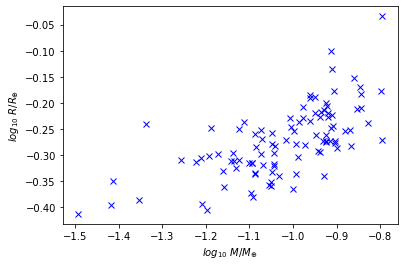

In [8]:
plt.plot(np.log10(M1), np.log10(R1), 'bx')
plt.xlabel(r'$log_{10}\ M/M_{\oplus}$')
plt.ylabel(r'$log_{10}\ R/R_{\oplus}$')
plt.show()

================================

predict the mean and std of mass given those of the radius

In [9]:
Mmedian, Mplus, Mminus = mr.Rstat2M(mean=0.1, std=0.01, unit='Jupiter', sample_size=100, grid_size=1e3, classify='Yes')

Terran 71.0%, Neptunian 29.0%, Jovian 0.0%, Star 0.0%


In [10]:
print('M = {0:.3f} (+ {1:.3f} - {2:.3f}) MEarth'.format(Mmedian, Mplus, Mminus))

M = 0.004 (+ 0.005 - 0.001) MEarth


================================

predict a vector of mass given a vector of radius

In [11]:
R2 = np.loadtxt('demo_radius.dat')
M2 = mr.Rpost2M(R2, unit='Earth', grid_size=1e3, classify='Yes')

Terran 67.0%, Neptunian 33.0%, Jovian 0.0%, Star 0.0%


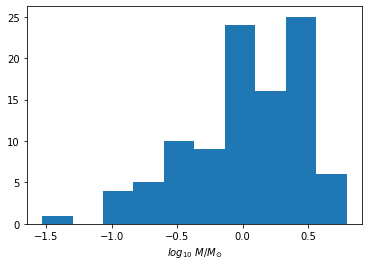

In [12]:
plt.hist(np.log10(M2))
plt.xlabel(r'$log_{10}\ M/M_{\odot}$')
plt.show()